In [1]:
from fastPLNmodels.utils import build_block_Sigma, C_from_Sigma, sample_PLN, MSE
import torch
from fastPLNmodels.models import IMPS_PLN, log_likelihood, fastPLN, fastPLNPCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

device  cpu


In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else : 
    device = torch.device('cpu')
    
#device = torch.device('cpu') # think I can't use RTX A5000 right now, will check this later. 
torch.cuda.is_available()
# print('device ', device)

False

## Importation of the data

In [4]:
Y = pd.read_csv('Y_test')
O = pd.read_csv('O_test')
cov = pd.read_csv('cov_test')
true_Sigma = torch.from_numpy(pd.read_csv('true_Sigma_test').values)
true_beta = torch.from_numpy(pd.read_csv('true_beta_test').values)

##  Test fastPLN model

Initialization ...
nb iteration to find the mode:  194
Initialization finished
Last delta: 0.03373093195629906,  reached in 28 iterations
Last ELBO : 94.99759422692755


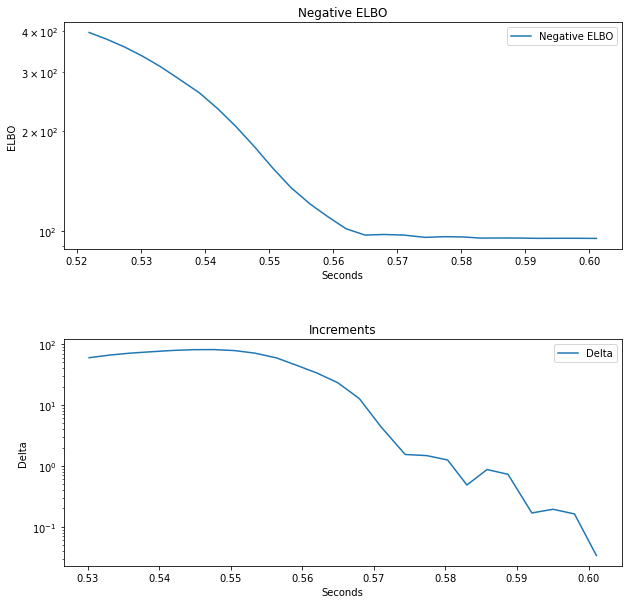

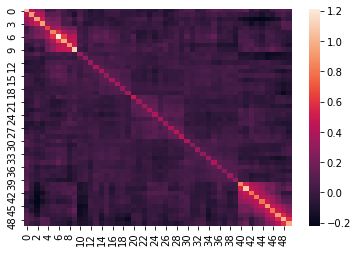

In [6]:
fast = fastPLN()
fast.fit(Y,O,cov)
print(fast)

In [7]:
print('beta : ', fast.get_beta())
print('Sigma:', fast.get_Sigma())
print('C : ', fast.get_C())

beta :  tensor([[ 0.5375, -0.0976, -0.9135,  0.2747, -0.4369,  0.7195, -0.0179,  0.1734,
          0.5758,  0.7049, -0.1523, -0.0486, -0.9653, -1.3956, -0.8930, -0.8930,
         -1.4953, -0.7724, -0.2089,  1.3298, -0.5236, -0.4063,  0.4362, -1.3217,
          0.8974, -0.0756, -0.9305, -0.6832,  0.6456,  0.0539, -0.0257, -1.1807,
         -0.0101,  0.0827,  0.1530, -1.3327,  1.1858, -0.2213,  2.3158, -0.1347,
          0.1523, -0.2519,  0.5391, -0.6852, -0.1411,  0.5211,  0.6622,  0.3123,
         -0.9497, -0.2741],
        [-0.3998,  0.6248, -0.0451,  0.4057, -0.8926, -0.8509,  0.0712,  0.1906,
         -0.7831, -0.6294, -0.5039, -0.7114,  0.4855, -0.3483, -0.3786,  0.2932,
         -0.1739, -0.0342, -0.0892, -0.0558, -0.7611, -1.3005,  0.3431, -0.2618,
         -0.3865, -0.8375, -0.2714,  0.2245, -0.1980,  0.2113,  0.3171, -0.2035,
         -0.5630,  0.5865, -0.7002,  0.0988,  0.1976, -0.5724, -0.0706, -0.5073,
          0.5680,  0.6246,  0.1776,  0.5277, -0.6248,  1.6214,  0.5128, -

## Test fastPLNPCA

Initialization ...
nb iteration to find the mode:  60
Initialization finished
Tolerance 0.001 reached in 471 iterations
Last ELBO : -103.18143906753183
Dimension of the latent space : 5


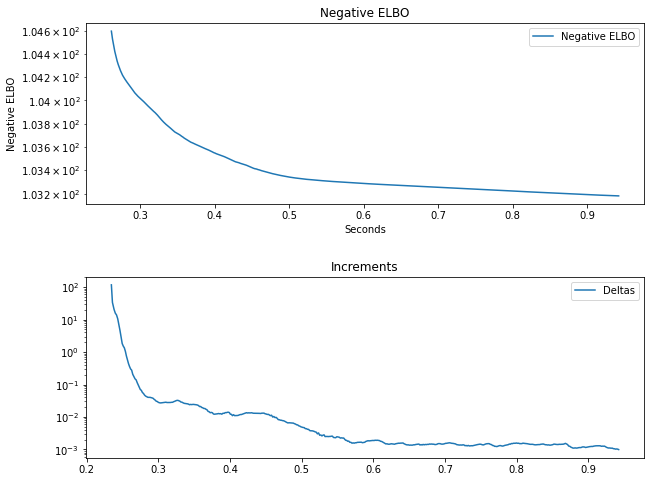

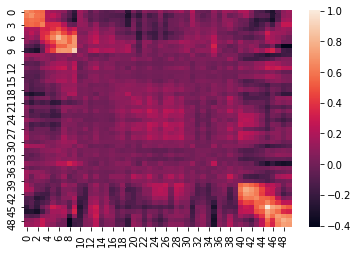

In [10]:
fastpca = fastPLNPCA(q = 5)
fastpca.fit(Y,O,cov)
print(fastpca)

In [11]:
print('beta : ', fastpca.get_beta())
print('Sigma:', fastpca.get_Sigma())
print('C : ', fastpca.get_C())

beta :  tensor([[ 0.4921, -0.1335, -0.8689,  0.2483, -0.5047,  0.7232,  0.0101,  0.2265,
          0.6203,  0.7416, -0.1841, -0.0317, -1.0193, -1.3959, -1.0111, -0.9393,
         -1.5690, -0.7923, -0.2056,  1.3680, -0.5229, -0.3695,  0.4910, -1.3300,
          0.9609, -0.0655, -0.9682, -0.6931,  0.7692,  0.0597, -0.0711, -1.1720,
         -0.0671,  0.0920,  0.1398, -1.3222,  1.2412, -0.2619,  2.2759, -0.1613,
          0.1319, -0.2621,  0.5682, -0.6791, -0.1430,  0.4859,  0.7328,  0.3364,
         -0.9697, -0.2220],
        [-0.4336,  0.6922, -0.0112,  0.3619, -0.9919, -0.8741,  0.1116,  0.1537,
         -0.7997, -0.7271, -0.5555, -0.7087,  0.5575, -0.2733, -0.3118,  0.2983,
         -0.1742, -0.0423, -0.1038, -0.0293, -0.7271, -1.3643,  0.3613, -0.3783,
         -0.4141, -0.8725, -0.3184,  0.2569, -0.2056,  0.2087,  0.3474, -0.1897,
         -0.6059,  0.6833, -0.7234,  0.0801,  0.2532, -0.6104, -0.0704, -0.5323,
          0.5621,  0.6965,  0.2243,  0.5655, -0.6589,  1.5920,  0.4957, -

## Test IMPS_PLN

device  cpu
Intialization ...
Initalization done


 22%|██▏       | 112/500 [00:31<01:47,  3.59it/s]

Algorithm stopped after  112  iterations
Max likelihood: -103.04030839518593


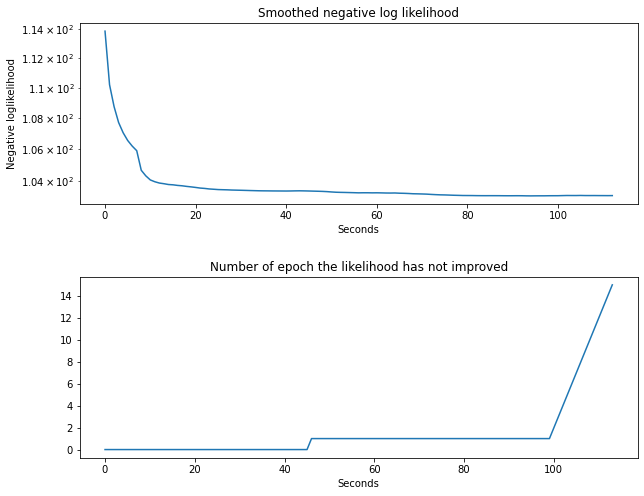

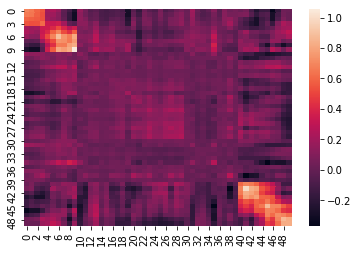

In [28]:
imps = IMPS_PLN(q = 5)
imps.fit(Y,O,cov)
print(imps)

In [15]:
print('beta : ', imps.get_beta())
print('Sigma:', imps.get_Sigma())
print('C : ', imps.get_C())

beta :  tensor([[ 0.5319, -0.1286, -0.9118,  0.2196, -0.5501,  0.7098, -0.0512,  0.1287,
          0.5618,  0.6380, -0.1822, -0.0517, -1.0352, -1.4089, -1.0043, -0.9508,
         -1.5333, -0.7870, -0.2195,  1.3637, -0.5500, -0.3784,  0.4841, -1.3099,
          0.9395, -0.0897, -0.9752, -0.6879,  0.7681,  0.0425, -0.0818, -1.1697,
         -0.0794,  0.0716,  0.1251, -1.3632,  1.2246, -0.2534,  2.3016, -0.1352,
          0.1280, -0.3523,  0.5177, -0.7209, -0.1243,  0.5502,  0.7485,  0.3261,
         -1.0124, -0.2889],
        [-0.3688,  0.6966, -0.0611,  0.3833, -1.0528, -0.9435, -0.0092,  0.0033,
         -0.8806, -0.8904, -0.5710, -0.7291,  0.4935, -0.3190, -0.3351,  0.2781,
         -0.2219, -0.0509, -0.1223, -0.0372, -0.7687, -1.3786,  0.3807, -0.3960,
         -0.4027, -0.8715, -0.3271,  0.2408, -0.2199,  0.2229,  0.3529, -0.1587,
         -0.6257,  0.6852, -0.7469,  0.1797,  0.2518, -0.5882, -0.0730, -0.5182,
          0.5133,  0.5887,  0.1786,  0.5281, -0.6902,  1.6824,  0.5284, -

## True value of Sigma 

<AxesSubplot:>

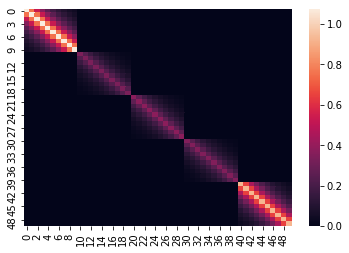

In [16]:
sns.heatmap(true_Sigma)

<AxesSubplot:>

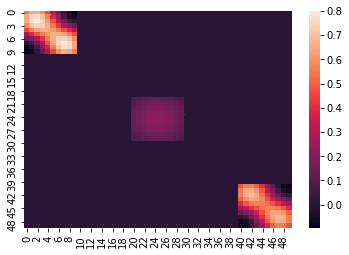

In [18]:
true_C = C_from_Sigma(true_Sigma, 5)
sns.heatmap(true_C@(true_C.T))